In [1]:
# code from http://www.davidsbatista.net/blog/2017/04/01/document_classification/
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("data/movies_genres.csv", delimiter='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117352 entries, 0 to 117351
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        117352 non-null  object
 1   plot         117352 non-null  object
 2   Action       117352 non-null  int64 
 3   Adult        117352 non-null  int64 
 4   Adventure    117352 non-null  int64 
 5   Animation    117352 non-null  int64 
 6   Biography    117352 non-null  int64 
 7   Comedy       117352 non-null  int64 
 8   Crime        117352 non-null  int64 
 9   Documentary  117352 non-null  int64 
 10  Drama        117352 non-null  int64 
 11  Family       117352 non-null  int64 
 12  Fantasy      117352 non-null  int64 
 13  Game-Show    117352 non-null  int64 
 14  History      117352 non-null  int64 
 15  Horror       117352 non-null  int64 
 16  Lifestyle    117352 non-null  int64 
 17  Music        117352 non-null  int64 
 18  Musical      117352 non-null  int64 
 19  My

In [4]:
df.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
len(df)

117352

In [6]:
list(df["plot"][:5])

[" #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms.",
 ' With just one week left in the workshops, the women consider the idea of "The One." The ladies are stunned when Jahmil finally comes to a decision about Bentley and if he\'s the one for her. Jack challenges Tennesha to express her feelings of love towards Errol, but can she put herself out there and face possible rejection?',
 " All of the women start making strides towards finding their own version of a happy ending. Tennesha and Errol decide to become exclusive, but Laree just isn't ready to tell Karl she loves him, even though he has expressed that sentiment to her. Cynthia finds it hard to venture out on her own after her tumultuous separation, and Monet finally finds peace in her divo

In [7]:
df2 = df[::30]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 117330
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3912 non-null   object
 1   plot         3912 non-null   object
 2   Action       3912 non-null   int64 
 3   Adult        3912 non-null   int64 
 4   Adventure    3912 non-null   int64 
 5   Animation    3912 non-null   int64 
 6   Biography    3912 non-null   int64 
 7   Comedy       3912 non-null   int64 
 8   Crime        3912 non-null   int64 
 9   Documentary  3912 non-null   int64 
 10  Drama        3912 non-null   int64 
 11  Family       3912 non-null   int64 
 12  Fantasy      3912 non-null   int64 
 13  Game-Show    3912 non-null   int64 
 14  History      3912 non-null   int64 
 15  Horror       3912 non-null   int64 
 16  Lifestyle    3912 non-null   int64 
 17  Music        3912 non-null   int64 
 18  Musical      3912 non-null   int64 
 19  Mystery      3912 non-nul

In [8]:
df2.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30,"""$weepstake$"" (1979) {(#1.1)}",This week's ticker buyers are a man who just ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,"""'Allo 'Allo!"" (1982) {The Crooked Fences (#6.6)}",Herr Flick is worried about his career in the...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
90,"""'Til Death"" (2006) {Doug and Ally Return (#4.1)}","Eddie and Joy's free-spirited daughter, Ally,...",0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
120,"""0511 TV Lokal"" (2007) {Johannes Heesters Auss...","Johan Marius Nicolaas Heesters, called ""Jopi(...",0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [10]:
# 장르별 영화 개수 카운트
df_genres = df2.drop(['plot', 'title'], axis=1)
counts = []
categories = list(df_genres.columns.values)
for i in categories:
    counts.append((i, df_genres[i].sum()))
df_stats = pd.DataFrame(counts, columns=['genre', '#movies'])
df_stats

,genre,#movies
0,Action,407
1,Adult,3
2,Adventure,340
3,Animation,371
4,Biography,47
5,Comedy,1159
6,Crime,499
7,Documentary,411
8,Drama,1514
9,Family,529


<AxesSubplot:xlabel='genre'>

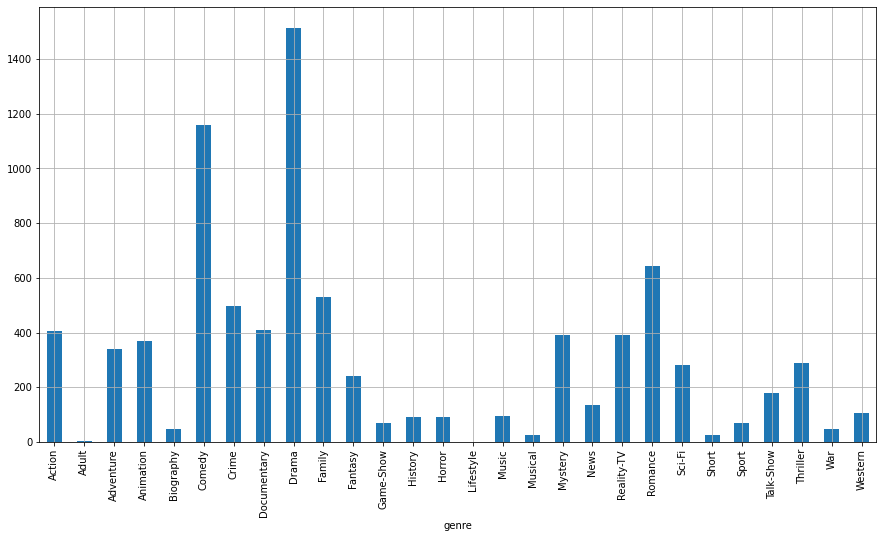

In [11]:
df_stats.plot(x='genre', y='#movies', kind='bar', legend=False, grid=True, figsize=(15, 8))

In [12]:
df2.drop('Lifestyle', axis=1, inplace=True)

d:\program\python\python37\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
from langdetect import detect
df2['plot_lang'] = df2.apply(lambda row: detect(row['plot']), axis=1)
df2['plot_lang'].value_counts()

d:\program\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


en    3907
nl       4
de       1
Name: plot_lang, dtype: int64

In [14]:
df2.plot_lang.isin(['en'])

0         True
30        True
60        True
90        True
120       True
          ... 
117210    True
117240    True
117270    True
117300    True
117330    True
Name: plot_lang, Length: 3912, dtype: bool

In [15]:
df2 = df2[df2.plot_lang.isin(['en'])]
df2.to_csv("data/movies_genres_en.csv", sep='\t', encoding='utf-8', index=False)

# Clustering

In [16]:
data = pd.read_csv('data/movies_genres_en.csv', delimiter='\t')

In [17]:
data.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,plot_lang
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,en
1,"""$weepstake$"" (1979) {(#1.1)}",This week's ticker buyers are a man who just ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,en
2,"""'Allo 'Allo!"" (1982) {The Crooked Fences (#6.6)}",Herr Flick is worried about his career in the...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,en
3,"""'Til Death"" (2006) {Doug and Ally Return (#4.1)}","Eddie and Joy's free-spirited daughter, Ally,...",0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,en
4,"""0511 TV Lokal"" (2007) {Johannes Heesters Auss...","Johan Marius Nicolaas Heesters, called ""Jopi(...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,en


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3907 non-null   object
 1   plot         3907 non-null   object
 2   Action       3907 non-null   int64 
 3   Adult        3907 non-null   int64 
 4   Adventure    3907 non-null   int64 
 5   Animation    3907 non-null   int64 
 6   Biography    3907 non-null   int64 
 7   Comedy       3907 non-null   int64 
 8   Crime        3907 non-null   int64 
 9   Documentary  3907 non-null   int64 
 10  Drama        3907 non-null   int64 
 11  Family       3907 non-null   int64 
 12  Fantasy      3907 non-null   int64 
 13  Game-Show    3907 non-null   int64 
 14  History      3907 non-null   int64 
 15  Horror       3907 non-null   int64 
 16  Music        3907 non-null   int64 
 17  Musical      3907 non-null   int64 
 18  Mystery      3907 non-null   int64 
 19  News         3907 non-null 

In [19]:
docs = list(data['plot'])

In [20]:
docs[:3]

[" #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms.",
 " This week's ticker buyers are a man who just got out of jail and is on probation needs to try and find a legitimate job, a woman who's separated from her husband who has a girlfriend and a dog whose owner's relatives try to get a piece of what he wins.",
 ' Herr Flick is worried about his career in the Gestapo after all the recent cock-ups and feels he has to flee. For this he needs money and he demands René to give him the painting so he can sell it. Von Strohm, Gruber, Helga and Bertorelli also want the painting back and sell it because the escape of the airmen has made them nervous about their futures too. Meanwhile, Crabtree is reunited with an old love!']

In [21]:
# 텍스트 전처리 함수

import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [22]:
# docs[0] 확인
print(docs[0])
print(text_process(docs[0]))

 #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms.
['7dayslater', 'interactive', 'comedy', 'series', 'featuring', 'ensemble', 'cast', 'YouTube', 'celebrities', 'week', 'audience', 'writes', 'brief', 'via', 'social', 'media', 'allnew', 'episode', 'featuring', 'wellknown', 'gueststar', 'Seven', 'days', 'later', 'weeks', 'episode', 'premieres', 'TV', 'across', 'multiple', 'platforms']


In [23]:
# sklearn의 CountVectorizer 함수 사용, bow(bag of words)로 변환하는 객체 생성
bow_transformer = CountVectorizer(analyzer=text_process).fit(docs)

In [24]:
len(bow_transformer.vocabulary_)

36366

In [25]:
# 문서 확인
docs[9]

" Gen. Hoagland, a strictly by-the-book desk jockey, visits the 918th to evaluate Gen. Savage's performance, but he arrives with a headstrong bias because Savage has a reputation for improvised tactics to deal with the randomness of war, as well as an apparent obsession with an especially dangerous target deep within Germany. Sparks fly from the moment Hoagland lands hellbent on getting Savage fired. In an effort to show Hoagland the vagaries of combat, Savage invites him to tag along on a mission. And then the unthinkable; Hoagland is killed in a manner that casts suspicion on Savage. If the looming inquiry is not enough of a distraction, Savage also has to deal with a mentally unstable pilot who has lost confidence in himself and his commander, and may provide information that could cast a very dark shadow on the investigation."

In [26]:
bow_9 = bow_transformer.transform([docs[9]])
print(bow_9)

  (0, 476)	1
  (0, 6117)	2
  (0, 6178)	1
  (0, 7131)	4
  (0, 13630)	5
  (0, 13631)	1
  (0, 14397)	1
  (0, 17536)	1
  (0, 17544)	1
  (0, 17790)	1
  (0, 17933)	1
  (0, 18648)	1
  (0, 19362)	1
  (0, 19596)	1
  (0, 19608)	1
  (0, 20244)	1
  (0, 20287)	1
  (0, 20508)	1
  (0, 20855)	1
  (0, 21269)	1
  (0, 21279)	1
  (0, 21334)	2
  (0, 21430)	1
  (0, 21651)	1
  (0, 22056)	1
  :	:
  (0, 27315)	1
  (0, 27470)	1
  (0, 27592)	1
  (0, 27825)	1
  (0, 27907)	1
  (0, 28571)	1
  (0, 29352)	1
  (0, 29518)	1
  (0, 30341)	1
  (0, 30669)	1
  (0, 31284)	1
  (0, 32369)	1
  (0, 32532)	1
  (0, 33626)	1
  (0, 33962)	1
  (0, 34091)	1
  (0, 34095)	1
  (0, 34153)	1
  (0, 35334)	1
  (0, 35350)	1
  (0, 35454)	1
  (0, 35644)	1
  (0, 35771)	1
  (0, 35922)	1
  (0, 36115)	1


In [ ]:
# 이제 docs를 변형
docs = bow_transformer.transform(docs)

In [ ]:
# docs 확인
print('Shape of Sparse Matrix: ', docs.shape)
print('Amount of Non-Zero occurrences: ', docs.nnz)

In [ ]:
190579/(3907*36343)*100

In [ ]:
# 그런데 여기서 주의해야할 것 하나.
# docs는 현재 document-term matrix 로 구성됨
# NMF를 적용하기 위해서는 term-document matrix가 필요하다.
# 즉, 현재의 Matrix를 transposed matrix(전치행렬)로 바꿔줘야 함.
type(docs)

In [ ]:
# compressed sparse row matrix인 docs를 transpose 한다.
docs_trans = docs.transpose()
type(docs_trans) 

In [ ]:
print('Shape of Sparse Matrix: ', docs_trans.shape)
print('Amount of Non-Zero occurrences: ', docs_trans.nnz)

In [ ]:
# NMF 모델 객체 생성
from sklearn.decomposition import NMF
model = NMF(n_components=27)

In [ ]:
# NMF 모델 학습
W = model.fit_transform(docs_trans)

In [ ]:
H = model.components_

In [ ]:
type(H)

In [ ]:
H.shape

In [ ]:
print(H[:,5])

In [ ]:
pred_labels = H.argmax(axis=0)

In [ ]:
len(pred_labels)

In [ ]:
pred_labels

In [ ]:
# modified on 2020-11-16
data_y = data.drop(['title', 'plot', 'plot_lang'], axis=1).to_numpy()

In [ ]:
H[:,:3]

In [ ]:
data_y

In [ ]:
len(data_y)

In [ ]:
target = list(data_y.argmax(axis=1)) # 정답 !!!
category_list = data.drop(['title', 'plot', 'plot_lang'], axis=1).columns
target_cate = [category_list[t] for t in target]

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(target, pred_labels))

In [ ]:
cmatrix = confusion_matrix(target, pred_labels)
cmatrix = pd.DataFrame(confusion_matrix(target, pred_labels))
cmatrix.index = data.drop(['title', 'plot', 'plot_lang'], axis=1).columns
cmatrix

In [ ]:
cmatrix.sum(axis=0)

In [ ]:
cmatrix = cmatrix.to_numpy()

In [ ]:
cmatrix[:,:3]

In [ ]:
cmatrix[:,:3].argmax(axis=0)

In [ ]:
cmatrix[:,:10].argmax(axis=0)

In [ ]:
cmatrix.argmax(axis=0)

In [ ]:
set(cmatrix.argmax(axis=0))

In [ ]:
list(cmatrix.argmax(axis=0))

In [ ]:
best_labels = list(cmatrix.argmax(axis=0))

In [ ]:
data.drop(['title', 'plot', 'plot_lang'], axis=1).columns[[0,5,6,7,8,17,19]]

In [ ]:
len(cmatrix.transpose())

In [ ]:
i = 0
sum_result = 0
for c in cmatrix.transpose():
    print(c)
    print('label:', best_labels[i])
    print('value:', c[best_labels[i]])
    sum_result += c[best_labels[i]]
    i += 1

In [ ]:
print(sum_result)

In [ ]:
sum_result/len(data_y)

In [ ]:
category_list = data.drop(['title', 'plot', 'plot_lang'], axis=1).columns

In [ ]:
category_list = data.drop(['title', 'plot', 'plot_lang'], axis=1).columns
[category_list[t] for t in target]

In [ ]:
result = pd.DataFrame(cmatrix)
result.index = data.drop(['title', 'plot', 'plot_lang'], axis=1).columns
result.columns = [result.index[l] for l in best_labels]
result

In [ ]:
result.sum(axis=0)

In [ ]:
type(result.sum(axis=0))

In [ ]:
clusters = {}
for i in range(len(best_labels)):
    num = result.sum(axis=0)[i]
    label = best_labels[i]
    cate = result.index[label]
    if cate in clusters:
        clusters[cate] += num
    else:
        clusters[cate] = num

In [ ]:
clusters

In [ ]:
list(clusters.values())/sum(list(clusters.values()))*100